# Food Delivery Time Prediction

The goals of this notebook are:

- Load and validate the Kaggle dataset
- Explore the data (EDA) to identify the main drivers of delivery time

## About Dataset

This dataset is designed for predicting food delivery times based on various influencing factors such as distance, weather, traffic conditions, and time of day. It offers a practical and engaging challenge for machine learning practitioners, especially those interested in logistics and operations research.

| Feature                | Description                                                                                   |
|-------------------------|-----------------------------------------------------------------------------------------------|
| **Order_ID**            | Unique identifier for each order.                                                             |
| **Distance_km**         | The delivery distance in kilometers.                                                          |
| **Weather**             | Weather conditions during the delivery (Clear, Rainy, Snowy, Foggy, Windy).                   |
| **Traffic_Level**       | Traffic conditions categorized as Low, Medium, or High.                                       |
| **Time_of_Day**         | The time when the delivery took place (Morning, Afternoon, Evening, Night).                   |
| **Vehicle_Type**        | Type of vehicle used for delivery (Bike, Scooter, Car).                                       |
| **Preparation_Time_min**| Time required to prepare the order, measured in minutes.                                      |
| **Courier_Experience_yrs** | Experience of the courier in years.                                                        |
| **Delivery_Time_min**   | **Target variable**: total delivery time in minutes.                                          |

### Features

For more information about features in the dataset, see [Food Delivery Time Prediction](https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction/).


## Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
SEED = 7
TARGET = "Delivery_Time_min"

random.seed(SEED)
np.random.seed(SEED)

In [4]:
df = pd.read_csv('../data/food_delivery_data.csv')

In [5]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [6]:
df.shape

(1000, 9)

In [7]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


### Missing Values

In [9]:
df.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [10]:
# Check if its randomly missing
df[df.isna().any(axis=1)].sample(n = 10, random_state = 1)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
611,302,10.86,Windy,Medium,NaN,Car,10,4.0,60
396,406,17.96,Clear,NaN,Evening,Scooter,26,0.0,74
532,623,7.72,Rainy,Medium,Morning,Bike,11,NaN,36
987,331,7.44,Rainy,Low,Evening,Bike,27,NaN,53
628,941,5.84,Clear,NaN,Evening,Bike,21,7.0,35
867,139,7.59,Clear,NaN,Afternoon,Scooter,16,3.0,37
276,197,14.66,Windy,Medium,NaN,Bike,20,2.0,77
455,635,2.59,Windy,Medium,NaN,Bike,13,5.0,28
588,39,13.84,Clear,Low,Morning,Scooter,18,NaN,64
828,393,7.75,NaN,Medium,Evening,Scooter,21,1.0,55


### Duplicates

In [11]:
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


### Label Validation

In [12]:
# Check for inconsistent labels or unexpected categories
for c in ["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"]:
    print(c, sorted(df[c].dropna().unique().tolist()))

Weather ['Clear', 'Foggy', 'Rainy', 'Snowy', 'Windy']
Traffic_Level ['High', 'Low', 'Medium']
Time_of_Day ['Afternoon', 'Evening', 'Morning', 'Night']
Vehicle_Type ['Bike', 'Car', 'Scooter']


### Target Variable

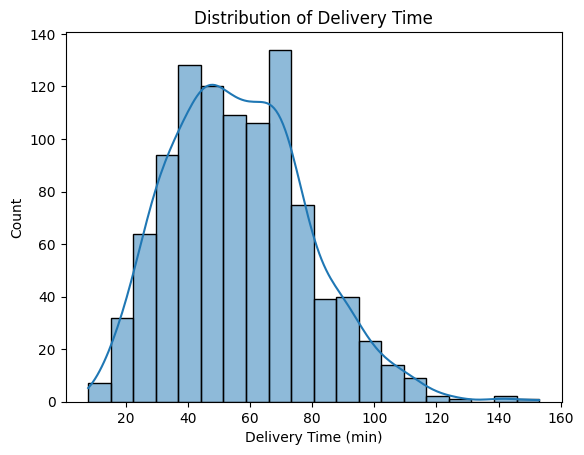

In [13]:
sns.histplot(df[TARGET], bins=20, kde=True)
plt.xlabel("Delivery Time (min)")
plt.ylabel("Count")
plt.title("Distribution of Delivery Time")
plt.show()

([0], [Text(0, 0, '')])

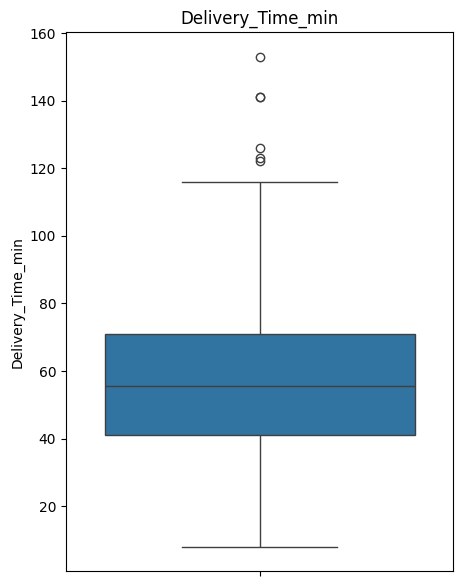

In [24]:
plt.figure(figsize=(5,7))
sns.boxplot(data=df, y=TARGET)
plt.title(f"Delivery_Time_min")
plt.xticks(rotation=15)

### Numeric Features

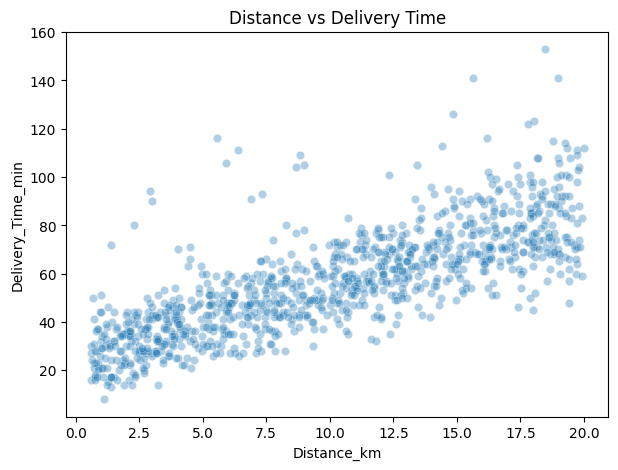

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Distance_km", y=TARGET, alpha=0.35)
plt.title("Distance vs Delivery Time")
plt.show()

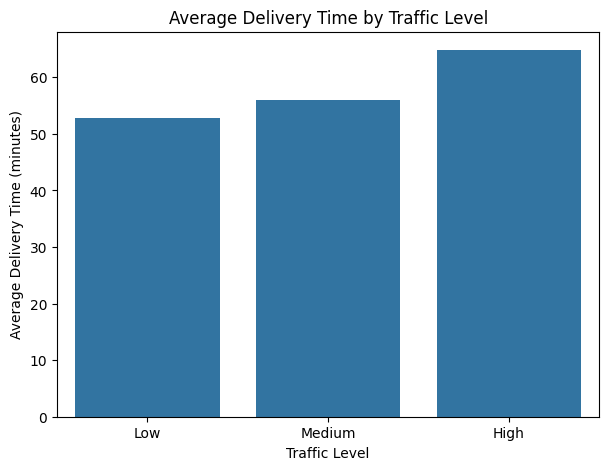

In [15]:
plt.figure(figsize=(7, 5))
sns.barplot(x='Traffic_Level', y='Delivery_Time_min', data=df, errorbar=None)
plt.title("Average Delivery Time by Traffic Level")
plt.xlabel("Traffic Level")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()

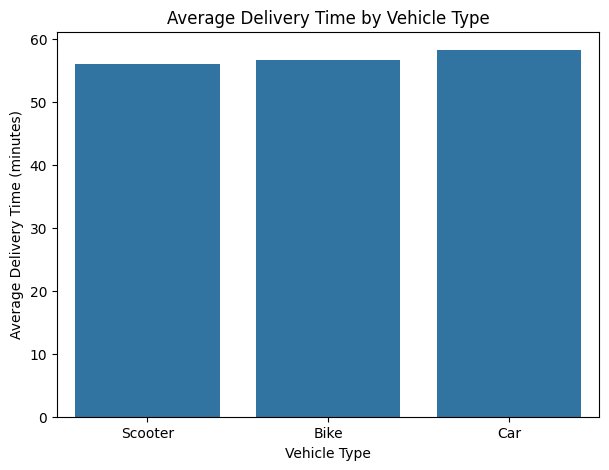

In [16]:
plt.figure(figsize=(7, 5))
sns.barplot(x='Vehicle_Type', y='Delivery_Time_min', data=df, errorbar=None)
plt.title("Average Delivery Time by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()

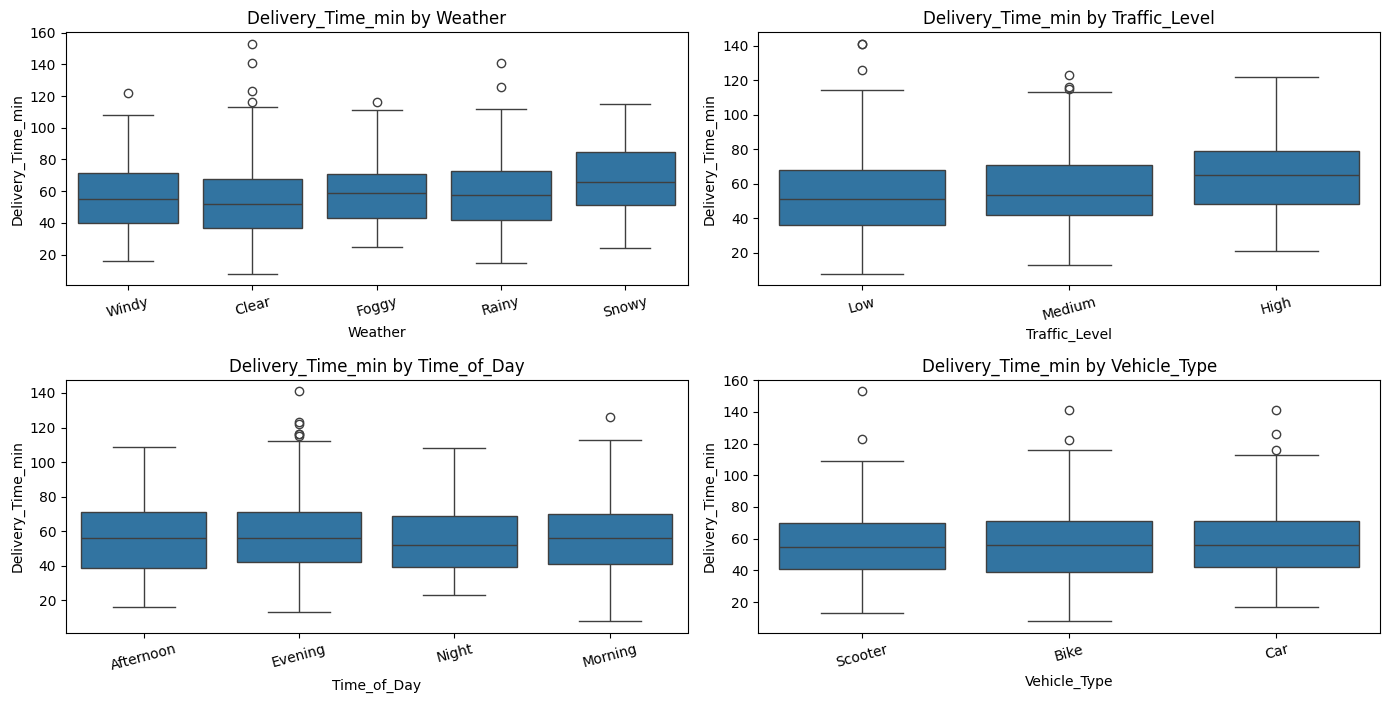

In [17]:
categorical_cols = ["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"]

plt.figure(figsize=(14,10))
for i, c in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols) // 2 + 1, 2, i)
    sns.boxplot(data=df, x=c, y=TARGET)
    plt.title(f"Delivery_Time_min by {c}")
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

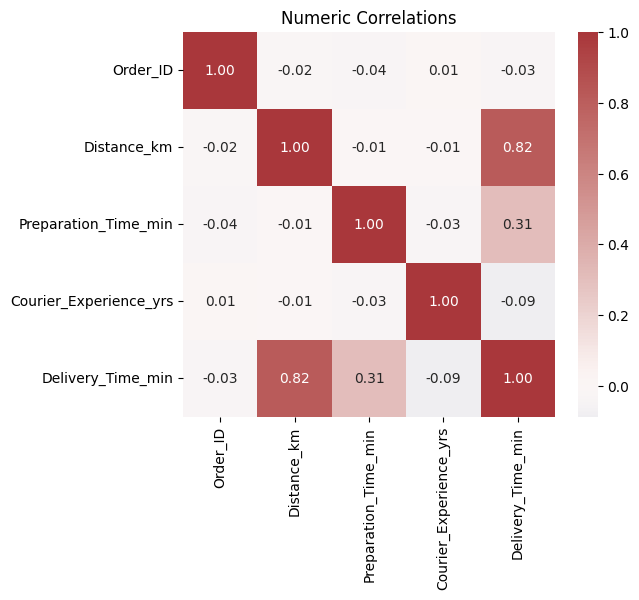

In [18]:
numeric_df = df.select_dtypes(include=['number'])
spearman_corr = numeric_df.corr(method='spearman')

plt.figure(figsize=(6,5))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Numeric Correlations"); plt.show()

### Observations

| Observation                                                                                                                   | Action                                                               |
| ----------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------- |
| Missing values detected in `weather`, `traffic_level`, `time_of_day`, and `courier_experience_yrs`. Most likely MCAR          | Impute categoricals with the most frequent value due to low missing percentage. |
| Labels for categorical features are consistent and no unexpected categories found.                                            | Encode using One-Hot Encoding. Try Ordinal Encoding for Traffic.     |
| Delivery distance strongly correlates with delivery time (r ≈ 0.78).                                                          | Keep as a core predictor.                                            |
| Preparation time shows moderate correlation with delivery time (r ≈ 0.31).                                                    | Keep as a secondary predictor.                                       |
| Higher traffic inflates delivery times, especially at longer distances.                                                       | Keep as predictor.                                                   |
| Courier experience and vehicle type show weak correlation with delivery time.                                                 | Low importance. May be dropped if it improves model performance.     |
| Snowy deliveries take longest while clear and windy are fastest.                                                              | Keep as predictor.                                                   |